# <h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-1.-Heart-Disease-Classification" data-toc-modified-id="Case-X.-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case 1. Heart Disease Classification</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Modes-and-training" data-toc-modified-id="Modes-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modes and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 1. Heart Disease Classification
- Juho Oksa
- Oliver Andersson
- Hannu Korhonen<br>
Last edited: 02.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# Background

The purpose of this notebook is to learn how to read data from external sources and to use the data together with Keras neural networks.
We use the processed.cleveland.data taken from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
This data is being used to create and train our neural network

We aim to find an optimal architecture for our network that is both fast and accurate.
Ultimately we want to use this data to make an expert system that helps us decide whether the subject has a heart disease or not.

# Data

The data contained comes from one of four databases concerning heart disease diagnosis.<br>https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/<br> All attributes are numeric-valued, some of which are numbers indicating attribute class (e.g. 1=male, 0=female).
<table>
  <tr>
    <th>Index</th>
    <th>Attribute name</th>
    <th>Characteristics</th>
    <th>Values</th>
  </tr>
  <tr>
    <td>1</td>
    <td>age</td>
    <td>age in years</td>
    <td>min: 29<br>max: 77</td>
  </tr>
  <tr>
    <td>2</td>
    <td>sex</td>
    <td>sex</td>
    <td>1 = male<br>0 = female</td>
  </tr>
  <tr>
    <td>3</td>
    <td>cp</td>
    <td>chest pain type</td>
    <td>1 = typical angina<br>2 = atypical angina<br>3 = non-anginal pain<br>4 = asymptomatic</td>
  </tr>
  <tr>
    <td>4</td>
    <td>trestbps</td>
    <td>resting blood pressure in mm Hg</td>
    <td>min: 94<br>max: 200</td>
  </tr>
  <tr>
    <td>5</td>
    <td>chol</td>
    <td>serum cholestoral in mg/dl</td>
    <td>min: 126<br>max: 564</td>
  </tr>
  <tr>
    <td>6</td>
    <td>fbs</td>
    <td>fasting blood sugar > 120 mg/dl</td>
    <td>1 = true<br>0 = false</td>
  </tr>
  <tr>
    <td>7</td>
    <td>restecg</td>
    <td>resting electrocardiographic results</td>
    <td>0 = normal<br>1 = having ST-T wave abnormality<br>2 = showing probable or definite left ventricular hypertrophy</td>
  </tr>
  <tr>
    <td>8</td>
    <td>thalach</td>
    <td>maximum heart rate achieved</td>
    <td>min: 71<br>max: 202</td>
  </tr>
  <tr>
    <td>9</td>
    <td>exang</td>
    <td>exercise induced angina</td>
    <td>1 = yes<br>0 = no</td>
  </tr>
  <tr>
    <td>10</td>
    <td>oldpeak</td>
    <td>ST depression induced by exercise relative to rest</td>
    <td>min: 0<br>max: 6.2</td>
  </tr>
  <tr>
    <td>11</td>
    <td>slope</td>
    <td>the slope of the peak exercise ST segment</td>
    <td>1 = upsloping<br>2 = flat<br>3 = downsloping</td>
  </tr>
  <tr>
    <td>12</td>
    <td>ca</td>
    <td>number of major vessels</td>
    <td>min: 0<br>max: 3<br>NaN values replaced with median values</td>
  </tr>
  <tr>
    <td>13</td>
    <td>thal</td>
    <td>thal</td>
    <td>3 = normal<br>6 = fixed defect<br>7 = reversable defect<br>NaN values replaced with median values</td>
  </tr>
  <tr>
    <td>14</td>
    <td>num</td>
    <td>diagnosis of heart disease (angiographic disease status)<br></td>
    <td>min: 0<br>max: 4<br>
        0 if value = 0<br>
        1 if value > 0</td>
  </tr>
</table>

In [9]:
%pylab inline
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [10]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(filename, 
                 index_col = None,
                 header = None,
                 na_values = '?')

#Preprocess the data

#Fill the NaN value with median values in the corresponding column
data_processed = df.fillna(df.median())

data_processed.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
#Split the data into the training sets and testing sets

train_data, test_data, train_targets, test_targets = train_test_split(data_processed.loc[:,0:12],
                                                                      data_processed.loc[:, 13] > 0,
                                                                      shuffle=True)

In [12]:
#Normalize the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#Separate a validation set from the training data

partial_train_data = train_data[:170]
partial_train_targets = train_targets[:170]
val_data = train_data[170:]
val_targets = train_targets[170:]

# Models and training

In [13]:
#Import needed tensorflow libraries and methods

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

Our first model didn't address overfitting at all.

In [ ]:
model = Sequential()
model.add(Dense(36, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(36, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_train_data, partial_train_targets,
                    epochs=200, batch_size=16, verbose=0,
                    validation_data = (val_data, val_targets))

With this model the accuracy of the predictions with the testing set changed wildly and the difference with accuracy and loss function between the training set and validation set kept rising as the model trained.

<img src='plots.png'>

Next we tried to prevent overfitting by adding dropout after the hidden layers. 

In [ ]:
model = Sequential()
model.add(Dense(36, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_train_data, partial_train_targets,
                    epochs=200, batch_size=16, verbose=0,
                    validation_data = (val_data, val_targets))

Although the differences between training and validation got smaller, the difference was still notable.

<img src='plots2.png'>

After this we added l2 regularizer to the hidden layers and this ended up being the model with least overfitting.

In [15]:
model = Sequential()
model.add(Dense(36, kernel_regularizer=regularizers.l2(0.2), activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(36, kernel_regularizer=regularizers.l2(0.2), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(partial_train_data, partial_train_targets,
                    epochs=200, batch_size=16, verbose=0,
                    validation_data = (val_data, val_targets))

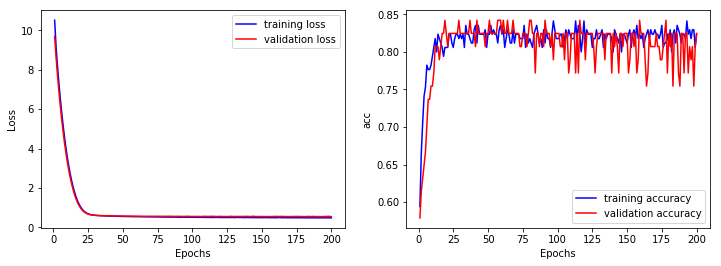

In [18]:
import matplotlib.pyplot as plt

#Plot the differences between the outcome of the training set and the validation set during the training

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

time = range(1,len(loss)+1)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(time, acc, 'b-', label="training accuracy")
plt.plot(time, val_acc, 'r-' ,label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

From this we can see that the model does not improve after 35 epochs and the accuracy suffers slightly after 75 epochs.<br>
<br>
We tried using different activation and loss functions with different amount of neurons and hidden layers but this model produced the best results consistently, thus this is our final model:

In [20]:
#reinitialize the model
model = Sequential()
model.add(Dense(36, kernel_regularizer=regularizers.l2(0.2), activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(36, kernel_regularizer=regularizers.l2(0.2), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
#run the model for 35 epochs
history = model.fit(partial_train_data, partial_train_targets,
                    epochs=35, batch_size=16, verbose=0,
                    validation_data = (val_data, val_targets))

# Results and Discussion

Our best model consistently reached over 82% accuracy with the test set.

In [22]:
#Here we evaluate the latest model with the training set and the testing set and print the accuracy with which they
#predicted the heart disease
_, train_acc = model.evaluate(partial_train_data, partial_train_targets, verbose=0)
_, test_acc = model.evaluate(test_data, test_targets, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.824, Test: 0.882


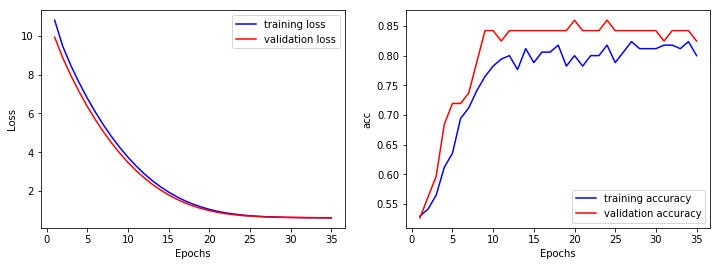

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

time = range(1,len(loss)+1)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(time, acc, 'b-', label="training accuracy")
plt.plot(time, val_acc, 'r-' ,label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Conclusions

For our first neural network exercise we achieved satisfactory results. We found out that making a neural network requires quite a bit of knowledge and trial and error. It is difficult to predict the outcome of using different parameters for the amount of neurons, hidden layers and using different loss and activation functions.<br>
<br>
With the model reaching around the same accuracy with the training set and the testing set we can conclude that out model isn't biased towards the training set.